# 1.&nbsp; Initiating


## &nbsp;1.1 Installing Libraries

In [1]:
# Install libraries
!pip install pandas numpy matplotlib seaborn scikit-learn gensim pyLDAvis sastrawi -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.2 MB/s eta 0:00:00


In [2]:
!pip install --upgrade nltk

In [3]:
import nltk

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import shutil
nltk_data_dir = '/root/nltk_data'
shutil.rmtree(nltk_data_dir, ignore_errors=True)
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.data.path.append(nltk_data_dir)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
nltk.download('punkt_tab', download_dir='/root/nltk_data', quiet=True)
nltk.data.find('tokenizers/punkt_tab')

FileSystemPathPointer('/root/nltk_data/tokenizers/punkt_tab')

In [33]:
nltk.download('stopwords', download_dir='/root/nltk_data', quiet=True)
nltk.data.find('corpora/stopwords')

FileSystemPathPointer('/root/nltk_data/corpora/stopwords')

In [8]:
!pip install spacy -q

## &nbsp;1.2 Import Libraries

In [9]:
# basic
import pandas as pd
import numpy as np
import spacy

# visualized
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# prep
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    # import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# modelling
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel
from gensim import corpora
from gensim.models import CoherenceModel

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## &nbsp;1.3 Connect to G-Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# &nbsp;2. Prepared the Data / EDA

## &nbsp;2.1 Load dataset

In [11]:
file_path = "/content/drive/MyDrive/Colab Notebooks/LDA for IKN/IKN.csv"
df = pd.read_csv(file_path)

In [12]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1828993551813996936,Thu Aug 29 23:57:32 +0000 2024,2,@Aryprasetyo85 Kalau cara-cara seperti ini yg ...,1829307426627289397,NaN,Aryprasetyo85,in,"Ciomas, Indonesia",0,0,1,https://x.com/mulyadiabdullah/status/182930742...,105077210,mulyadiabdullah
1,1829102996015460448,Thu Aug 29 23:51:45 +0000 2024,0,@Boediantar4 Ga tertarik lagi sma perkara d jk...,1829305974580236763,NaN,Boediantar4,in,NaN,0,0,0,https://x.com/ludvya_fiqry/status/182930597458...,1045714723088433152,ludvya_fiqry
2,1829070888047882256,Thu Aug 29 23:50:14 +0000 2024,0,@Masfkr @ludovicusdwi @ImaginarySteady @jokowi...,1829305590449143953,NaN,Masfkr,in,NaN,0,1,0,https://x.com/MahrezNabil2016/status/182930559...,1758433575194816512,MahrezNabil2016
3,1828993551813996936,Thu Aug 29 23:48:27 +0000 2024,2,@Aryprasetyo85 dan banyak cebong bangga dg ikn,1829305142610723146,NaN,Aryprasetyo85,in,"Depok, Indonesia",0,0,0,https://x.com/DpkWulan/status/1829305142610723146,1404211742540853248,DpkWulan
4,1829295018278093151,Thu Aug 29 23:47:43 +0000 2024,0,@Hansunriko IKN Nusantara🇮🇩,1829304959818731958,NaN,Hansunriko,in,NaN,0,0,0,https://x.com/Tatarori80/status/18293049598187...,1373275046970462214,Tatarori80


## &nbsp;2.2 Explore the dataset

In [13]:
df.shape

(1000, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1000 non-null   int64 
 1   created_at               1000 non-null   object
 2   favorite_count           1000 non-null   int64 
 3   full_text                1000 non-null   object
 4   id_str                   1000 non-null   int64 
 5   image_url                388 non-null    object
 6   in_reply_to_screen_name  493 non-null    object
 7   lang                     1000 non-null   object
 8   location                 488 non-null    object
 9   quote_count              1000 non-null   int64 
 10  reply_count              1000 non-null   int64 
 11  retweet_count            1000 non-null   int64 
 12  tweet_url                1000 non-null   object
 13  user_id_str              1000 non-null   int64 
 14  username                 1000 non-null   

In [15]:
duplicate_rows = df.duplicated()
print("Jumlah baris duplikat:", duplicate_rows.sum())

Jumlah baris duplikat: 0


In [16]:
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                       0
image_url                  612
in_reply_to_screen_name    507
lang                         0
location                   512
quote_count                  0
reply_count                  0
retweet_count                0
tweet_url                    0
user_id_str                  0
username                     0
dtype: int64


In [17]:
dfIKN = df[['full_text']]

In [18]:
dfIKN.head()

,full_text
0,@Aryprasetyo85 Kalau cara-cara seperti ini yg ...
1,@Boediantar4 Ga tertarik lagi sma perkara d jk...
2,@Masfkr @ludovicusdwi @ImaginarySteady @jokowi...
3,@Aryprasetyo85 dan banyak cebong bangga dg ikn
4,@Hansunriko IKN Nusantara🇮🇩


In [19]:
dfIKN.shape

(1000, 1)

In [20]:
dfIKN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


# &nbsp; 3. Pre-Processing

## &nbsp; 3.1 Case Cleaning

In [21]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_tweet_special)

In [22]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_singl_char)

In [23]:
print('Case Cleaning Result : \n')
print(dfIKN['full_text'].head())

Case Cleaning Result : 

0    Kalau caracara seperti ini yg dipakai bisa jad...
1    Ga tertarik lagi sma perkara  jkarta gw lbih t...
2    Katanya kan Dateng aja ke IKN bang nanti juga ...
3                      dan banyak cebong bangga dg ikn
4                                        IKN Nusantara
Name: full_text, dtype: object


## &nbsp;3.2 Case Folding

In [24]:
dfIKN['full_text'] = dfIKN['full_text'].str.lower()

print('Case Folding Result : \n')
print(dfIKN['full_text'].head())

Case Folding Result : 

0    kalau caracara seperti ini yg dipakai bisa jad...
1    ga tertarik lagi sma perkara  jkarta gw lbih t...
2    katanya kan dateng aja ke ikn bang nanti juga ...
3                      dan banyak cebong bangga dg ikn
4                                        ikn nusantara
Name: full_text, dtype: object


In [25]:
# dfIKN['full_text'] = dfIKN['full_text'].astype(str)

## &nbsp;3.2 Tokenize

In [26]:
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

text = "Contoh tokenisasi dengan NLTK."
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Contoh', 'tokenisasi', 'dengan', 'NLTK', '.']


In [27]:
# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dfIKN['full_text_token'] = dfIKN['full_text'].apply(word_tokenize_wrapper)

In [28]:
dfIKN.head()

,full_text,full_text_token
0,kalau caracara seperti ini yg dipakai bisa jad...,"[kalau, caracara, seperti, ini, yg, dipakai, b..."
1,ga tertarik lagi sma perkara jkarta gw lbih t...,"[ga, tertarik, lagi, sma, perkara, jkarta, gw,..."
2,katanya kan dateng aja ke ikn bang nanti juga ...,"[katanya, kan, dateng, aja, ke, ikn, bang, nan..."
3,dan banyak cebong bangga dg ikn,"[dan, banyak, cebong, bangga, dg, ikn]"
4,ikn nusantara,"[ikn, nusantara]"


In [29]:
print('Tokenizing Result : \n')
print(dfIKN['full_text_token'].head())

Tokenizing Result : 

0    [kalau, caracara, seperti, ini, yg, dipakai, b...
1    [ga, tertarik, lagi, sma, perkara, jkarta, gw,...
2    [katanya, kan, dateng, aja, ke, ikn, bang, nan...
3               [dan, banyak, cebong, bangga, dg, ikn]
4                                     [ikn, nusantara]
Name: full_text_token, dtype: object


## &nbsp; 3.4 Stopwords Removal

In [34]:
list_stopwords = stopwords.words('indonesian')

# add additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'bisnis', 'pandemi', 'indonesia'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dfIKN['full_text_token'] = dfIKN['full_text_token'].apply(stopwords_removal)

print(dfIKN['full_text_token'].head())

0    [caracara, dipakai, rakyat, disana, mendoakan,...
1    [tertarik, sma, perkara, jkarta, gw, lbih, ter...
2    [dateng, ikn, bang, paham, denger, narasi, isi...
3                                [cebong, bangga, ikn]
4                                     [ikn, nusantara]
Name: full_text_token, dtype: object


## &nbsp; 3.5 Stemming

In [35]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming teks
def stemming_text(text_tokens):
    # Gabungkan token menjadi string
    text_string = " ".join(text_tokens)
    # Lakukan stemming
    return stemmer.stem(text_string)

# Melakukan stemming pada kolom 'full_text_token'
dfIKN['stemmed_text'] = dfIKN['full_text_token'].apply(stemming_text)

In [ ]:
dfIKN['stemmed_text'].head()

,stemmed_text
0,caracara pakai rakyat sana doa ikn mangkrak
1,tarik sma perkara jkarta gw lbih tarik walikot...
2,dateng ikn bang paham denger narasi isi jelek ...
3,cebong bangga ikn
4,ikn nusantara


In [ ]:
# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dfIKN['result_stemmed'] = dfIKN['stemmed_text'].apply(word_tokenize_wrapper)

In [ ]:
dfIKN['result_stemmed'].head()

,result_stemmed
0,"[caracara, pakai, rakyat, sana, doa, ikn, mang..."
1,"[tarik, sma, perkara, jkarta, gw, lbih, tarik,..."
2,"[dateng, ikn, bang, paham, denger, narasi, isi..."
3,"[cebong, bangga, ikn]"
4,"[ikn, nusantara]"


## &nbsp; 3.6 TF (Term Frequency)

In [ ]:
# Membuat objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan token dalam list menjadi string
corpus = dfIKN['result_stemmed'].apply(lambda x: ' '.join(x))  # Menggabungkan token menjadi string

# Menghitung Term Frequency (TF)
X = vectorizer.fit_transform(corpus)

# Menampilkan hasil berupa dataframe dengan fitur kata-kata
tf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
# Membuat dictionary dari data tokenized
dictionary = corpora.Dictionary(dfIKN['result_stemmed'])

# Konversi data ke format Bag of Words (BoW)
bow_corpus = [dictionary.doc2bow(text) for text in dfIKN['result_stemmed']]

# Tampilkan contoh dictionary dan BoW
print("Dictionary:\n", dictionary.token2id)  # Menampilkan kata dan ID-nya
print("\nBoW Corpus Contoh:\n", bow_corpus[:2])  # Menampilkan dua contoh dokumen BoW

Dictionary:
 {'caracara': 0, 'doa': 1, 'ikn': 2, 'mangkrak': 3, 'pakai': 4, 'rakyat': 5, 'sana': 6, 'gw': 7, 'jkarta': 8, 'lbih': 9, 'perkara': 10, 'sma': 11, 'tarik': 12, 'walikota': 13, 'yak': 14, 'apa': 15, 'bang': 16, 'benci': 17, 'dateng': 18, 'deket': 19, 'denger': 20, 'doktrin': 21, 'hal': 22, 'isi': 23, 'jelek': 24, 'kau': 25, 'lu': 26, 'narasi': 27, 'nerima': 28, 'nyata': 29, 'orang': 30, 'otak': 31, 'paham': 32, 'susah': 33, 'tetangga': 34, 'udah': 35, 'bangga': 36, 'cebong': 37, 'nusantara': 38, 'apbn': 39, 'butuh': 40, 'dipake': 41, 'doang': 42, 'duit': 43, 'gitu': 44, 'haaaaa': 45, 'jg': 46, 'joran': 47, 'kasih': 48, 'mati': 49, 'milu': 50, 'mulyono': 51, 'ngefek': 52, 'pas': 53, 'ratus': 54, 'ribu': 55, 'sayang': 56, 'suruh': 57, 'terima': 58, 'bandara': 59, 'hadir': 60, 'infrastruktur': 61, 'modern': 62, 'serius': 63, 'siap': 64, 'bangetdagang': 65, 'dagang': 66, 'dzolim': 67, 'gara': 68, 'goreng': 69, 'juta': 70, 'pajak': 71, 'perak': 72, 'proyek': 73, 'bales': 74, 'dm'

#&nbsp; 4. Modelling

## &nbsp; 4.1 LDA with Gensim

In [ ]:
# Menyusun model LDA
lda_model = LdaModel(bow_corpus,
                     num_topics=5,
                     id2word=dictionary,
                     passes=10,
                     alpha=0.5)

# Melihat topik yang ditemukan
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.056*"ikn" + 0.032*"nusantara" + 0.029*"bangun" + 0.028*"beneran" + 0.028*"kalimantan"')
(1, '0.049*"ikn" + 0.011*"pindah" + 0.010*"bangun" + 0.008*"kaltim" + 0.008*"jakarta"')
(2, '0.075*"ikn" + 0.014*"coba" + 0.014*"landas" + 0.013*"uji" + 0.011*"bangun"')
(3, '0.082*"ikn" + 0.015*"bangun" + 0.012*"logistik" + 0.011*"dukung" + 0.010*"anies"')
(4, '0.079*"ikn" + 0.012*"investasi" + 0.011*"pindah" + 0.010*"perintah" + 0.008*"tweet"')


In [ ]:
# Melihat topik yang ditemukan
topics = lda_model.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.056*"ikn" + 0.032*"nusantara" + 0.029*"bangun" + 0.028*"beneran" + 0.028*"kalimantan" + 0.027*"coblos" + 0.027*"timur" + 0.025*"sule"')
(1, '0.049*"ikn" + 0.011*"pindah" + 0.010*"bangun" + 0.008*"kaltim" + 0.008*"jakarta" + 0.007*"negara" + 0.006*"listrik" + 0.006*"kota"')
(2, '0.075*"ikn" + 0.014*"coba" + 0.014*"landas" + 0.013*"uji" + 0.011*"bangun" + 0.010*"jalan" + 0.010*"bandara" + 0.009*"proyek"')
(3, '0.082*"ikn" + 0.015*"bangun" + 0.012*"logistik" + 0.011*"dukung" + 0.010*"anies" + 0.010*"beneran" + 0.008*"nusantara" + 0.008*"yanti"')
(4, '0.079*"ikn" + 0.012*"investasi" + 0.011*"pindah" + 0.010*"perintah" + 0.008*"tweet" + 0.008*"rakyat" + 0.007*"bangun" + 0.007*"investor"')


## &nbsp; 4.2 Coherence Score

In [ ]:
# Menghitung coherence score
coherence_model_lda = CoherenceModel(
    model=lda_model,              # Model LDA yang telah dibuat
    texts=dfIKN['result_stemmed'],  # Data tokenized (hasil stemming & tokenisasi)
    dictionary=dictionary,        # Dictionary yang digunakan
    coherence='c_v'               # Metode coherence (misalnya 'c_v', 'u_mass', dll.)
)

# Mendapatkan nilai coherence
coherence_score = coherence_model_lda.get_coherence()

# Menampilkan hasil coherence score
print(f"Coherence Score: {coherence_score:.4f}")

Coherence Score: 0.3362


   Num Topics  Coherence Score
0           2         0.376933
1           3         0.313289
2           4         0.363717
3           5         0.516182
4           6         0.391216
5           7         0.564657
6           8         0.490897
7           9         0.510343
8          10         0.429177


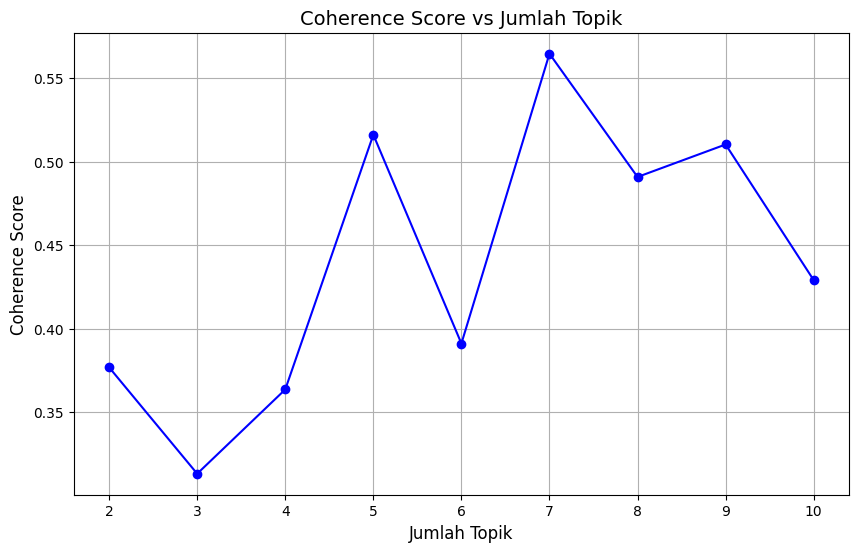

In [ ]:
# Menyimpan hasil coherence score
coherence_scores = []

# Menguji jumlah topik dari 2 hingga 10
for num_topics in range(2, 11):
    lda_model = LdaModel(
        bow_corpus,
        num_topics=num_topics,
        id2word=dictionary,
        passes=10,
        alpha=0.5
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=dfIKN['result_stemmed'],
        dictionary=dictionary,
        coherence='c_v'
    )
    score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, score))

# Membuat DataFrame dari hasil untuk tabel
coherence_df = pd.DataFrame(coherence_scores, columns=['Num Topics', 'Coherence Score'])

# Menampilkan tabel hasil
print(coherence_df)

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(coherence_df['Num Topics'], coherence_df['Coherence Score'], marker='o', linestyle='-', color='b')
plt.title('Coherence Score vs Jumlah Topik', fontsize=14)
plt.xlabel('Jumlah Topik', fontsize=12)
plt.ylabel('Coherence Score', fontsize=12)
plt.xticks(coherence_df['Num Topics'])
plt.grid()
plt.show()

## &nbsp; 4.3 LDA after Eval Coherence

In [ ]:
# Menyusun model LDA
lda_model = LdaModel(bow_corpus,
                     num_topics=7,
                     id2word=dictionary,
                     passes=10,
                     alpha=0.5)

# Melihat topik yang ditemukan
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.083*"ikn" + 0.022*"investasi" + 0.016*"bangun" + 0.013*"infrastruktur" + 0.013*"logistik"')
(1, '0.079*"ikn" + 0.034*"nusantara" + 0.033*"bangun" + 0.025*"kalimantan" + 0.025*"ekonomi"')
(2, '0.054*"ikn" + 0.013*"bangun" + 0.012*"mulyono" + 0.010*"istana" + 0.009*"pake"')
(3, '0.071*"ikn" + 0.019*"upacara" + 0.017*"hut" + 0.017*"ri" + 0.015*"jakarta"')
(4, '0.065*"ikn" + 0.021*"coba" + 0.020*"landas" + 0.020*"uji" + 0.016*"jalan"')
(5, '0.061*"ikn" + 0.008*"banget" + 0.008*"udara" + 0.006*"lengkap" + 0.006*"dukung"')
(6, '0.064*"ikn" + 0.020*"yanti" + 0.015*"bu" + 0.015*"beneran" + 0.015*"anies"')


In [ ]:
# Melihat topik yang ditemukan
topics = lda_model.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.083*"ikn" + 0.022*"investasi" + 0.016*"bangun" + 0.013*"infrastruktur" + 0.013*"logistik" + 0.012*"investor" + 0.011*"tweet" + 0.010*"apbn"')
(1, '0.079*"ikn" + 0.034*"nusantara" + 0.033*"bangun" + 0.025*"kalimantan" + 0.025*"ekonomi" + 0.024*"timur" + 0.024*"beneran" + 0.024*"sule"')
(2, '0.054*"ikn" + 0.013*"bangun" + 0.012*"mulyono" + 0.010*"istana" + 0.009*"pake" + 0.009*"madyarakat" + 0.006*"pusat" + 0.006*"september"')
(3, '0.071*"ikn" + 0.019*"upacara" + 0.017*"hut" + 0.017*"ri" + 0.015*"jakarta" + 0.012*"proyek" + 0.011*"laksana" + 0.008*"informasi"')
(4, '0.065*"ikn" + 0.021*"coba" + 0.020*"landas" + 0.020*"uji" + 0.016*"jalan" + 0.016*"bandara" + 0.012*"pacu" + 0.011*"lancar"')
(5, '0.061*"ikn" + 0.008*"banget" + 0.008*"udara" + 0.006*"lengkap" + 0.006*"dukung" + 0.006*"jasa" + 0.006*"jokowi" + 0.006*"cocok"')
(6, '0.064*"ikn" + 0.020*"yanti" + 0.015*"bu" + 0.015*"beneran" + 0.015*"anies" + 0.014*"risma" + 0.010*"bangun" + 0.010*"taeil"')


# &nbsp; 5. Deployment

## &nbsp; 5.1 Wordcloud

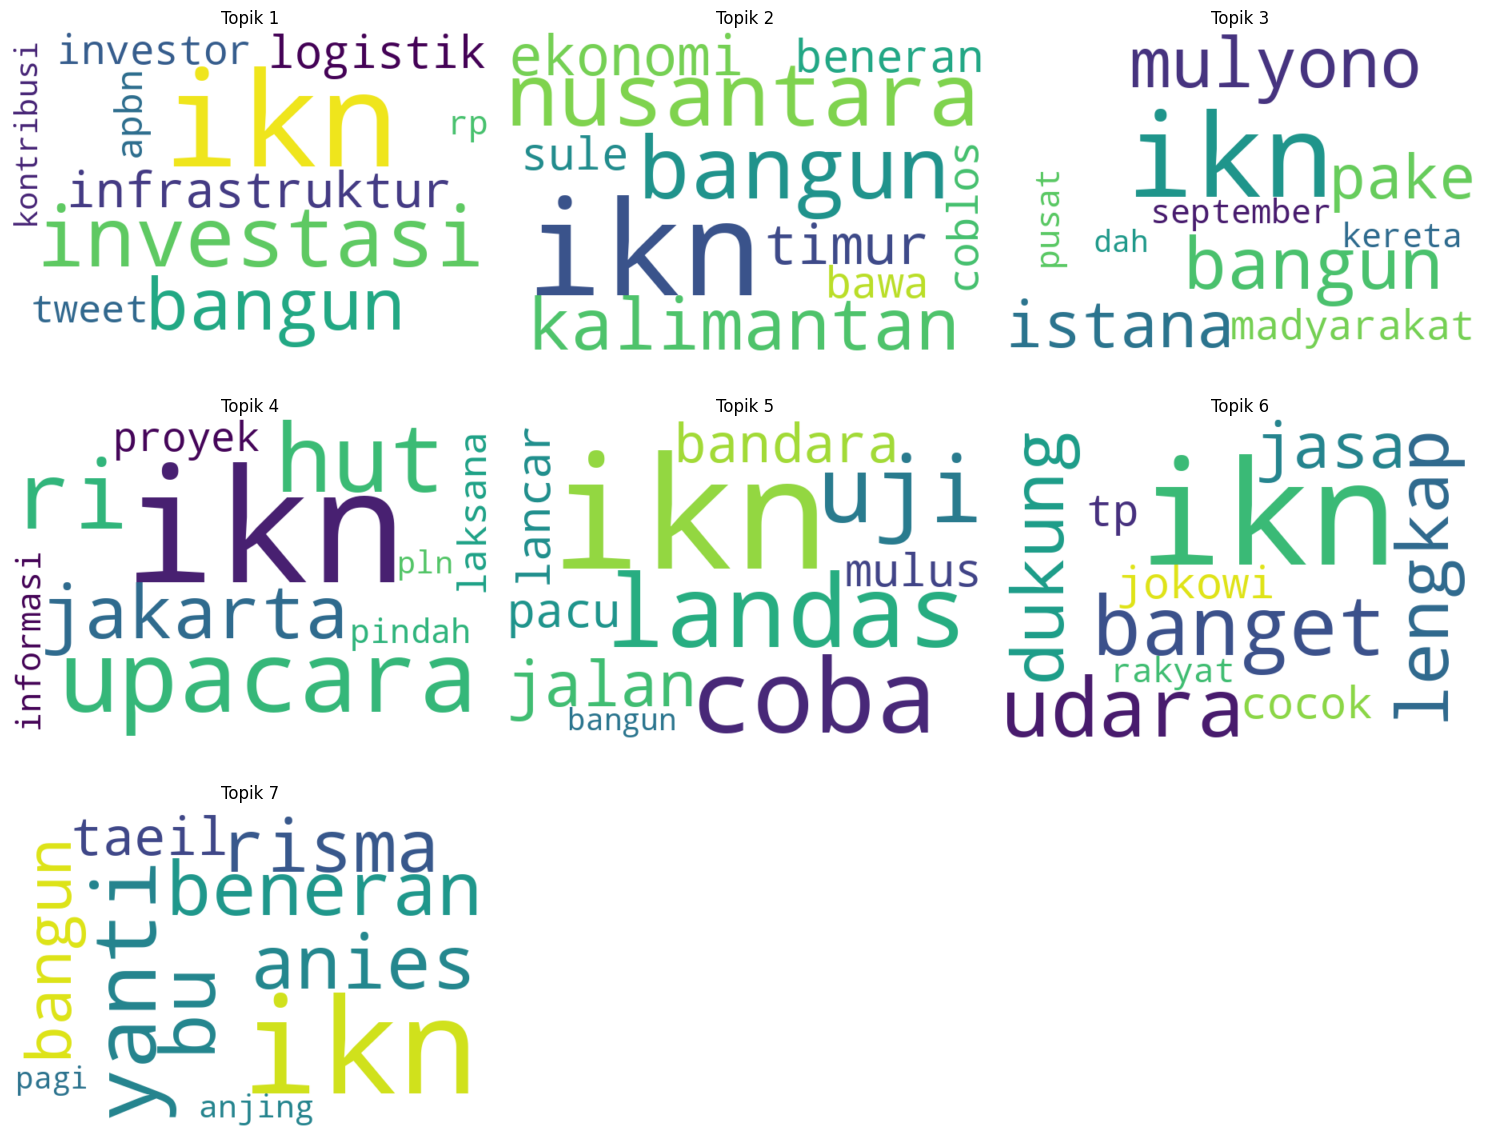

In [ ]:
# Menyiapkan data untuk WordCloud
topics = lda_model.print_topics(num_words=10)

# Membuat plot untuk setiap topik
plt.figure(figsize=(15, 12))
for i, topic in enumerate(topics):
    plt.subplot(3, 3, i+1)  # Menyusun plot dalam grid 3x3
    words = topic[1]  # Ambil kata-kata dalam topik
    # Pisahkan kata dan frekuensinya
    word_freq = {word.split('*')[1].strip().strip('"'): float(word.split('*')[0]) for word in words.split(' + ')}

    # Membuat WordCloud
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Menampilkan WordCloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

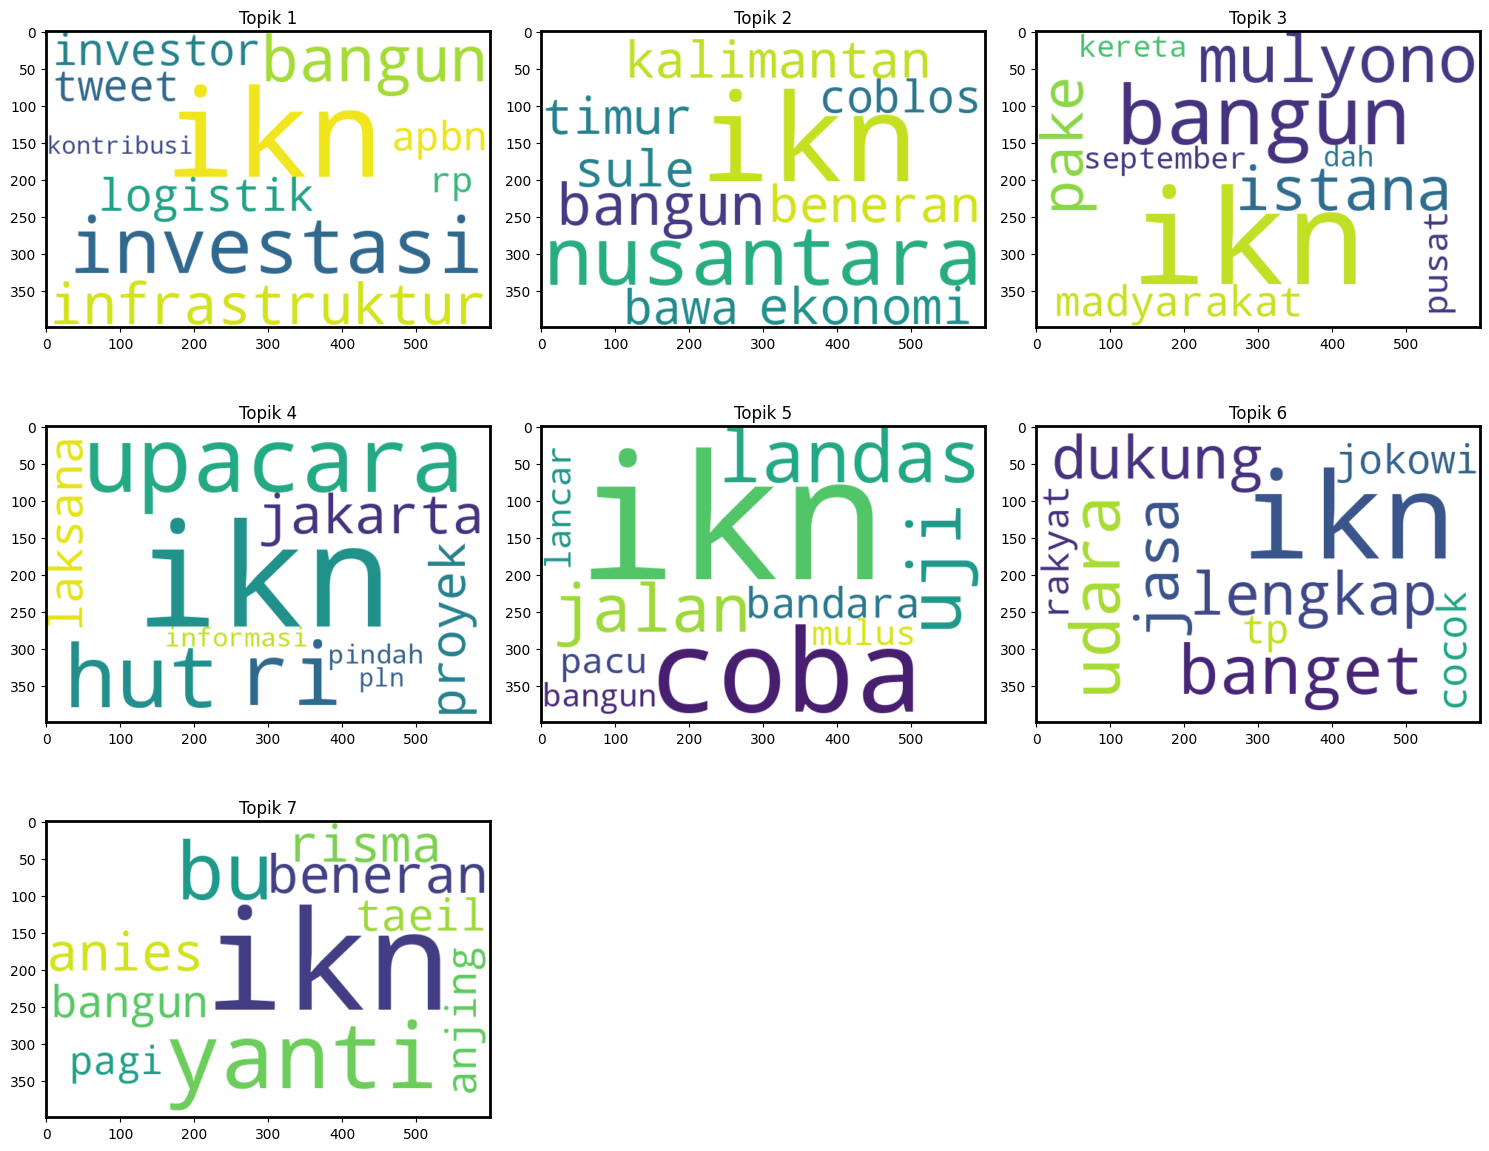

In [ ]:
# Menyiapkan data untuk WordCloud
topics = lda_model.print_topics(num_words=10)

# Membuat plot untuk setiap topik
plt.figure(figsize=(15, 12))
for i, topic in enumerate(topics):
    ax = plt.subplot(3, 3, i+1)  # Menyusun plot dalam grid 3x3
    words = topic[1]  # Ambil kata-kata dalam topik

    # Pisahkan kata dan frekuensinya
    word_freq = {word.split('*')[1].strip().strip('"'): float(word.split('*')[0]) for word in words.split(' + ')}

    # Membuat WordCloud
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Menampilkan WordCloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topik {i+1}')
    ax.axis('on')

    # Menambahkan border untuk tiap plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Warna border hitam
        spine.set_linewidth(2)        # Lebar garis border

plt.tight_layout()
plt.show()

## &nbsp; 5.2 pyLDAvis

In [ ]:
# Menyiapkan corpus dan dictionary untuk LDA
corpus = bow_corpus  # Anda bisa menggantinya dengan corpus yang Anda buat
dictionary = lda_model.id2word  # Gunakan dictionary dari model LDA

# Visualisasi model LDA
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Tampilkan visualisasi interaktif
pyLDAvis.display(vis)